## Wrapper Methods with Logistic Regression

In this project, it will analyze data from a survey conducted by Fabio Mendoza Palechor and Alexis de la Hoz Manotas that asked people about their eating habits and weight. The data was obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+). Categorical variables were changed to numerical ones in order to facilitate analysis.

The goal of this project is using a logistic regression model to try to predict whether survey respondents are obese based on their answers to questions in the survey. Also, it will use three different wrapper methods, including sequential forward selection, sequential backward floating selection, and recursive feature elimination, to choose a smaller feature subset. In addition, this project will evaluate the model accuracy on the resulting smaller feature subsets and compare that with the model accuracy using all available features.

### Import Python Modules

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

The data set `obesity` contains 18 predictor variables. Here's a brief description of them.

* `Gender` is `1` if a respondent is male and `0` if a respondent is female.
* `Age` is a respondent's age in years.
* `family_history_with_overweight` is `1` if a respondent has family member who is or was overweight, `0` if not.
* `FAVC` is `1` if a respondent eats high caloric food frequently, `0` if not.
* `FCVC` is `1` if a respondent usually eats vegetables in their meals, `0` if not.
* `NCP` represents how many main meals a respondent has daily (`0` for 1-2 meals, `1` for 3 meals, and `2` for more than 3 meals).
* `CAEC` represents how much food a respondent eats between meals on a scale of `0` to `3`.
* `SMOKE` is `1` if a respondent smokes, `0` if not.
* `CH2O` represents how much water a respondent drinks on a scale of `0` to `2`.
* `SCC` is `1` if a respondent monitors their caloric intake, `0` if not.
* `FAF` represents how much physical activity a respondent does on a scale of `0` to `3`.
* `TUE` represents how much time a respondent spends looking at devices with screens on a scale of `0` to `2`.
* `CALC` represents how often a respondent drinks alcohol on a scale of `0` to `3`.
* `Automobile`, `Bike`, `Motorbike`, `Public_Transportation`, and `Walking` indicate a respondent's primary mode of transportation. Their primary mode of transportation is indicated by a `1` and the other columns will contain a `0`.

The outcome variable, `NObeyesdad`, is a `1` if a patient is obese and a `0` if not.

Use the `.head()` method and inspect the data.

In [2]:
# Load the data
obesity = pd.read_csv("obesity.csv")

# Inspect the data
obesity.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0


In order to use a linear regression model, split the data into predictor variables `X` and outcome variable `y`.

In [3]:
X = obesity.iloc[:,:-1]
y = obesity.iloc[:,-1]

### Build a Logistic regression model

Create a logistic regression model called `lr`. Include the parameter `max_iter=1000` to make sure that the model will converge when you try to fit it.

In [4]:
lr = LogisticRegression(max_iter=1000)

Train the model using the `.fit()` method on `lr` to fit the model to `X` and `y`.

In [5]:
lr.fit(X, y)

LogisticRegression(max_iter=1000)

### Model accuracy

It is important to have a model with high accuracy. A model's _accuracy_ is the proportion of classes that the model correctly predicts. Using the `.score()` method, it shows the model above having an accuracy of 76.6%. This means the model correctly predicts the class of about 76.6% of respondents.

In [6]:
print('The accuracy of this model is {}%.'.format(round(lr.score(X, y)*100,2)))

The accuracy of this model is 76.6%.


### Feature Selection
#### sequential forward selection

Create a sequential forward selection model and then train the model.

In [7]:
sfs = SFS(lr, 
          forward=True,
          floating=False,
          k_features=9, 
          scoring='accuracy', 
          cv=0)

In [8]:
sfs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          k_features=(9, 9), scoring='accuracy')

### Inspect the results

Check the model accuracy on the smaller feature set and inspect the results of sequential forward selection.

In [9]:
sfs.subsets_[9]

{'feature_idx': (0, 1, 2, 3, 6, 9, 10, 14, 17),
 'cv_scores': array([0.78351492]),
 'avg_score': 0.7835149218379914,
 'feature_names': ('Gender',
  'Age',
  'family_history_with_overweight',
  'FAVC',
  'CAEC',
  'SCC',
  'FAF',
  'Bike',
  'Walking')}

Use the dictionary `sfs.subsets_[9]` to print a tuple of chosen feature names along with the accuracy of the model.

In [10]:
print(sfs.subsets_[9]['feature_names'])
print(sfs.subsets_[9]['avg_score'])

('Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF', 'Bike', 'Walking')
0.7835149218379914


### Visualize model accuracy

It can be helpful to visualize the results of sequential forward selection. Plot the model accuracy as a function of the number of features used.

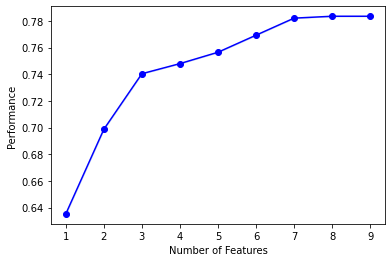

In [25]:
plot_sfs(sfs.get_metric_dict())
plt.show()

#### Sequential Backward Selection

Sequential forward selection was able to find a feature subset that performed marginally better than the full feature set. Let's use a different sequential method and see how it compares.

In [12]:
sbs = SFS(lr, 
          k_features=7, 
          forward=False, 
          floating=False, 
          scoring='accuracy', 
          cv=0)

Train the model with the `.fit()` method.

In [13]:
sbs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          forward=False, k_features=(7, 7), scoring='accuracy')

### Inspect the results

Check the model accuracy on the smaller feature set and inspect the results of sequential backward selection.

In [14]:
print(sbs.subsets_[7])

{'feature_idx': (0, 1, 2, 3, 6, 9, 10), 'cv_scores': array([0.78209379]), 'avg_score': 0.7820937944102321, 'feature_names': ('Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF')}


### Chosen features and model accuracy

Use the dictionary `sbs.subsets_[7]` to print a tuple of chosen feature names along with the accuracy of the model after doing sequential backward selection.

In [15]:
print(sbs.subsets_[7]['feature_names'])
print(sbs.subsets_[7]['avg_score'])

('Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF')
0.7820937944102321


### Visualize model accuracy

Visualize the results of sequential backward floating selection and plot the model accuracy as a function of the number of features used.

<Figure size 432x288 with 0 Axes>

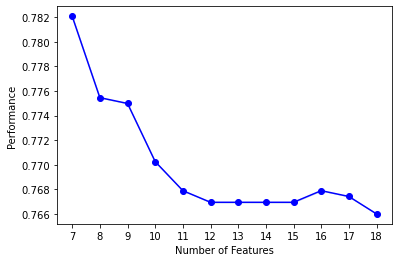

In [24]:
plt.clf()
plot_sfs(sbs.get_metric_dict())
plt.show()

#### Recursive Feature Elimination

The third wrapper method is recursive feature elimination. Standardize the data, then fit the model and inspect the results.

In [17]:
features = X.columns

### Standardize the data

Before doing applying recursive feature elimination it is necessary to standardize the data. Standardize `X` and save it as a DataFrame by creating a `StandardScaler()` object and using the `.fit_transform()` method.

In [18]:
X = pd.DataFrame(StandardScaler().fit_transform(X))

### Build a Recursive feature elimination model

Create an `RFE()` object that selects `8` features.

In [19]:
rfe = RFE(lr, 
          n_features_to_select=8)

eerr

Fit the recursive feature elimination model to `X` and `y`.

In [20]:
rfe.fit(X, y)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=8)

### Inspect chosen features

Create a list of chosen feature names using a list comprehension and filter the features in `zip(features, rfe.support_)`.

In [21]:
rfe_features = [f for (f, support) in zip(features, rfe.support_) if support]
rfe_features

['Age',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'CAEC',
 'SCC',
 'Automobile',
 'Walking']

### Model accuracy

Compute the model acuracy using the `.score()` method. The model accuracy is 76.79%.

In [22]:
print('The model accuracy after doing recursive feature elimination is {}%.'
                                          .format(round(rfe.score(X, y)*100, 2)))

The model accuracy after doing recursive feature elimination is 76.79%.
